# Lista 09 - Fundamentos Estatísticos para Ciência dos Dados A
- Aluno: Thiago Martin Poppe
- Matrícula: 2017014324

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Exercícios da seção 8.1

## Questão 01)
O objetivo do exercício é inteiramente análogo ao de reconhecimento de faces. Queremos um método de classificação de novas imagens de dígitos manuscritos. Assim, você deverá:

- Usando um conjunto de treinamento, criar uma regra de classificação de novas imagens de dígitos. Use os primeiros $k$ autovetores da matriz de covariância entre os pixels para fazer esta regra de classificação. Você deve fazer seus cálculos com $k = 5, 10, 15, 20$.

In [2]:
# Leitura dos dados de treinamento
# As imagens possuem tamanho 16x16 pixels (256 pixels)
# O primeiro valor de cada linha do arquivo representa a classe daquela imagem
with open('zip_code_dataset/zip.train') as ftrain:
    train_data = np.loadtxt(ftrain)
    train_labels = train_data[:, 0].astype(int)
    train_images = train_data[:, 1:]

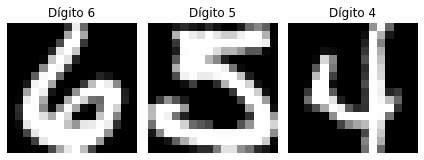

In [3]:
# Visualizando as 3 primeiras imagens do conjunto de treino
n_images = 3
fig, axs = plt.subplots(ncols=n_images)

for i in range(n_images):
    axs[i].imshow(train_images[i].reshape((16,16)), cmap='gray')
    axs[i].set_title('Dígito {}'.format(train_labels[i]))
    axs[i].axis('off')

fig.tight_layout()

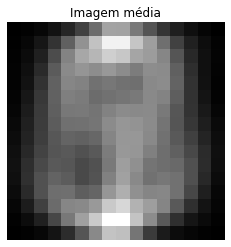

In [4]:
# Iremos obter agora a imagem média e visualizá-la
mean_image = np.mean(train_images, axis=0)

plt.title('Imagem média')
plt.imshow(mean_image.reshape((16,16)), cmap='gray')
plt.axis('off')
plt.show()

In [5]:
# O próximo passo é obtermos os autovalores da matriz de covariâncias
train_centralized_images = train_images - mean_image
covariance_matrix = np.cov(train_centralized_images.T)

print('Formato da matriz de covariâncias:', covariance_matrix.shape)

Formato da matriz de covariâncias: (256, 256)


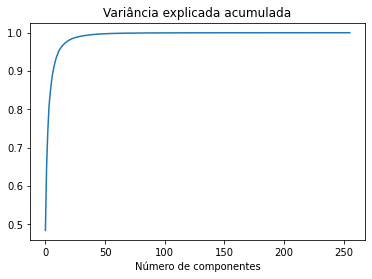

In [6]:
# Através dessa matriz iremos computar os componentes principais
# Iremos primeiramente computar todos os componentes principais para analisarmos
# a variância explicada como feito em sala de aula
pca = PCA(n_components=256)
pca.fit(covariance_matrix)

# Podemos perceber pelo plot que de fato nós conseguimos explicar
# boa parte da variânca dos dados com poucos componentes!!
plt.title('Variância explicada acumulada')
plt.xlabel('Número de componentes')
plt.plot(np.cumsum(pca.explained_variance_) / sum(pca.explained_variance_))
plt.show()

In [7]:
# Podemos agora usar K componentes principais para realizar a classificação de um dígito!

# Lendo os dados de teste
with open('zip_code_dataset/zip.test') as ftest:
    test_data = np.loadtxt(ftest)
    test_labels = test_data[:, 0].astype(int)
    test_images = test_data[:, 1:]

# Iremos criar um dicionário para guardas as predições para cada valor de K
predictions = {}
for k in [5, 10, 15, 20]:
    # Criando PCA com K componentes e aprendendo com a matriz de covariâncias
    pca = PCA(n_components=k)
    pca.fit(covariance_matrix)
    
    # Obtendo os coeficientes de cada conjunto (treino e teste)
    # Para isso, iremos usar a função transform, realizando os cálculos vistos em sala
    train_coef = pca.transform(train_images)
    test_coef = pca.transform(test_images)
    
    # Obtendo a média dos coeficientes para cada classe no treino
    mean_coefs = np.array([
        np.mean(train_coef[train_labels == digit], axis=0) for digit in range(10)
    ])
    
    # Obtendo as predições para cada dado no conjunto de teste
    # Iremos escolher a classe que possuir o coeficiente médio mais próximo!
    preds = []
    predictions[k] = np.array([
        np.argmin(np.mean((mean_coefs - coef)**2, axis=1)) for coef in test_coef
    ])

Predição para k=5: 7
Predição para k=10: 9
Predição para k=15: 9
Predição para k=20: 9


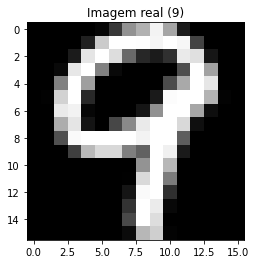

In [8]:
# Podemos observar as predições para a primeira imagem dos dados de teste
# Veremos que com 5 componentes nós teremos um erro!
for k in [5, 10, 15, 20]:
    print('Predição para k={}: {}'.format(k, predictions[k][0]))
    
plt.title('Imagem real ({})'.format(test_labels[0]))
plt.imshow(test_images[0].reshape((16,16)), cmap='gray')
plt.show()

- Usando apenas a amostra de TESTE, crie uma tabela de contingência $10 \times 10$ de confusão $C$. Nesta matriz $C$ as linhas representam a classe verdadeira do dígito (de 0 a 9) e a coluna a classe em que ele foi alocado. Na entrada $C_{ij}$ você deve colocar o número de itens (ou imagens) que caíram naquela categoria cruzada. Crie esta tabela com os quatro valores distintos de $k = 5, 10, 15, 20$.

In [9]:
confusion_matrices = {}
for k in [5, 10, 15, 20]:
    confusion_matrices[k] = confusion_matrix(test_labels, predictions[k])
    print('Matriz de confusão para k = {}:'.format(k))
    print('{}\n'.format(confusion_matrices[k]))

Matriz de confusão para k = 5:
[[274   0   3   1   2   7  62   0  10   0]
 [  0 258   0   0   1   1   3   0   1   0]
 [  6   3 128  16  16   4   9   2  14   0]
 [  9   0   4 106   0  13   2   0  32   0]
 [  2  10   7   0 127   1  10  16   1  26]
 [ 16   0   1  21  13  91   7   0   9   2]
 [ 21   0   2   0   4   2 139   0   2   0]
 [  0   3   1   0  10   1   0 113   4  15]
 [  6   2  13  11   2  11   3   5 102  11]
 [  0  13   1   0  21   0   0  31   8 103]]

Matriz de confusão para k = 10:
[[285   0   3   3   5   8  45   1   8   1]
 [  0 259   0   0   3   0   2   0   0   0]
 [  7   1 138  12  20   3   0   3  14   0]
 [  7   0   3 121   1  16   0   0  16   2]
 [  1   7   5   0 140   1   5   2   3  36]
 [ 14   1   0  15   5 106   4   0   9   6]
 [ 18   0   4   0   4   5 138   0   1   0]
 [  0   2   2   0   6   0   0 111   3  23]
 [  4   2   6   9   4   7   1   2 121  10]
 [  0   9   1   0  20   1   0  12   3 131]]

Matriz de confusão para k = 15:
[[294   0   3   2   4   3  40   1  11   1

- Calcule a proporção total das imagens da amostra de teste que caem na diagonal principal. Esta é uma medida global de classificação correta do método. Para qual valor de $k$ esta proporção foi máxima?

In [10]:
for k in [5, 10, 15, 20]:
    cm = confusion_matrices[k]
    prop = cm.diagonal().sum() / cm.sum()
    print('Proporção da diagonal principal para k = {}: {:.5f}'.format(k, prop))

Proporção da diagonal principal para k = 5: 0.71799
Proporção da diagonal principal para k = 10: 0.77230
Proporção da diagonal principal para k = 15: 0.79173
Proporção da diagonal principal para k = 20: 0.80020


- Preencha uma tabela com o valor de precisão média e a revocação média para cada valor de $k$.


- Precisão média é a média aritmética da precisão das 10 classes e definida pela equação abaixo, com $C_{i+}$ sendo a soma da linha $i$ na matriz de confusão.
$$
pm = \frac{1}{10}\sum_{i=0}^9 \frac{C_{ii}}{C_{i+}}
$$


- Revocação média é a média aritmética da revocação das 10 classes e definida pela equação abaixo, com $C{+i}$ sendo a soma da coluna $i$ na matriz de confusão.
$$
rm = \frac{1}{10}\sum_{i=0}^9\frac{C_{ii}}{C_{+i}}
$$

In [11]:
table = pd.DataFrame({'k': [5, 10, 15, 20]})

# Calculando a precisão média
table['Precisão Média'] = [np.mean(cm.diagonal() / cm.sum(axis=1)) for cm in confusion_matrices.values()]
table['Revocação Média'] = [np.mean(cm.diagonal() / cm.sum(axis=0)) for cm in confusion_matrices.values()]

table

,k,Precisão Média,Revocação Média
0,5,0.701201,0.702114
1,10,0.759921,0.763378
2,15,0.780449,0.782927
3,20,0.789681,0.792127


## Questão 02)
- Neste exercício, você vai gerar alguns vetores gaussianos tri-dimensionais que, de fato vivem em duas dimensões.

- **Nota:** o código abaixo foi originalmente escrito em R. Os plots foram omitidos e executados separadamente em uma IDE online da linguagem (apenas para melhor entendimento).

In [12]:
nsims = 200
Sigma = np.array([[3,2], [2,4]])

pts = np.random.multivariate_normal(mean=np.array([1,2]), cov=Sigma, size=nsims)
pts = np.append(pts, 3*pts[:,[0]] + 4*pts[:,[1]], axis=1)

A = np.array([1,0,0,1,3,4]).reshape((3,2))
var_pts = A @ Sigma @ A.T

print('var.pts:\n')
print(var_pts, end='\n\n')

print('round(cov(pts),2):')
print(np.round(np.cov(pts.T),2), end='\n\n')

print('eigen(var.pts):')
w, v = np.linalg.eig(var_pts)
print('- autovalores:', w)
print('- autovetores:')
print(v, end='\n\n')

print('eigen(cov(pts)):')
w, v = np.linalg.eig(np.cov(pts.T))
print('- autovalores:', w)
print('- autovetores:')
print(v, end='\n\n')

var.pts:

[[  3   2  17]
 [  2   4  22]
 [ 17  22 139]]

round(cov(pts),2):
[[  3.05   2.23  18.07]
 [  2.23   4.24  23.66]
 [ 18.07  23.66 148.86]]

eigen(var.pts):
- autovalores: [ 1.44561163e+02  1.43883735e+00 -1.46570351e-15]
- autovetores:
[[-0.11994934 -0.79966137 -0.58834841]
 [-0.15518217  0.60044473 -0.78446454]
 [-0.98057669  0.00279482  0.19611614]]

eigen(cov(pts)):
- autovalores: [1.54811417e+02 1.33415512e+00 8.18055046e-15]
- autovetores:
[[-0.1190624  -0.79979391 -0.58834841]
 [-0.155848    0.60027226 -0.78446454]
 [-0.98057919  0.00170731  0.19611614]]



- Quais os parâmetros $\mu$ e $\Sigma$ da distribuição gaussiana do vetor ``pts``?


**Resposta:** Teremos $\mu = [1,2]^T$ e que
$
\Sigma =
\begin{bmatrix}
3 & 2 \\
2 & 4
\end{bmatrix}
$.

Já para o vetor ``pts`` com 3-dimensões, isto é $\mathbf{X}=(X_1,X_2,X_3)^T$, teremos que:
$$
\begin{align}
\mu & = \mathbb{E}(\mathbf{X}) \\
    & = \mathbb{E}\left(\mathbf{A}\begin{pmatrix}X_1\\X_2\end{pmatrix}\right) \\
    & = \mathbf{A}\mathbb{E}\left(\begin{pmatrix}X_1\\X_2\end{pmatrix}\right) \\
    & = \begin{pmatrix} 1&0\\0&1\\3&4 \end{pmatrix}\begin{pmatrix} 1\\2 \end{pmatrix} \\
    & = \begin{pmatrix} 1&2&12 \end{pmatrix}^T
\end{align}
$$

Para a matriz $\Sigma$ nós temos o seu valor no print da variável ``var.pts``.

- Por que o comando ``round(cov(pts),2)`` não gera exatamente $\Sigma$ (ignore o erro de aproximação puramente numérico, não estocástico).


**Resposta:** Isto ocorre já que o cálculo da covariância de ``pts`` é uma estimativa empírica (através de uma amostra de tamanho 200) do resultado teórico $A \Sigma A^T$. Logo, quanto maior a nossa amostra mais próximo essa estimativa fica da real. Note que a matriz A é literalmente uma transformação que mantêm as duas colunas originais de ``pts`` e "cria" uma terceira realizando a combinação linear das colunas ($3\text{col}_1 + 4\text{col}_2$), assim como fizemos para adicionar a terceira coluna na matriz ``pts``!

- Qual o menor autovalor de $\Sigma$?

**Resposta:** Podemos ver através dos prints, tanto no cálculo dos autovalores na estimativa empírica ``cov(pts)`` quanto de ``var.pts``, que o menor autovalor será aproximadamente 0. Sendo assim, nós teremos que esse vetor gaussiano tri-dimensional "vive" de fato em duas dimensões, retratado pelas suas duas primeiras componentes (autovetores).

# Exercícios da seção 8.2

## Questão 01)
Neste exercício, você vai analisar os dados de uma análise química de vinhos. Você vai ler uma matriz com 178 amostras de diferentes vinhos. Haverá uma linha para cada vinho. A primeira coluna indica o cultivar do vinho (entenda como o tipo de uva usada na fabricação do vinho) tal como Sauvignon Blanc, Cabernet ou Chardonnay (rotulados como 1, 2 ou 3). As 13 colunas seguintes contêm as concentrações de 13 diferentes compostos químicos na amostra.

O objetivo é diferenciar entre os 3 tipos de vinho com base na sua composição química representada pelo vetor 13-dimensional $\mathbf{X}$. Você precisa criar uma regra para predizer o tipo de vinho (a primeira coluna) a partir das 13 variáveis de composição química. Vamos verificar que, ao invés de usarmos as 13 variáveis, poderemos nos basear em dois índices, os dois primeiros PCAs, que resumem toda a variabilidade simultânea das 13 variáveis.

**Nota:** o código abaixo foi originalmente escrito em R. Alguns plots foram omitidos e feito em uma IDE online separadamente para melhor entendimento.

In [13]:
filepath = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(filepath, header=None)

labels = wine.iloc[:, 0]
features = wine.iloc[:, 1:]

# Note que as variáveis estão em escalas diferentes!
# Logo, devemos padronizar as escalas
features.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
# Podemos padronizar as features usando o módulo StandardScaler do scikit-learn
scaler = StandardScaler().fit(features)
z_features = scaler.transform(features)

pd.DataFrame(z_features).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Formato da matriz de covariâncias: (13, 13)
Número de componentes: 13


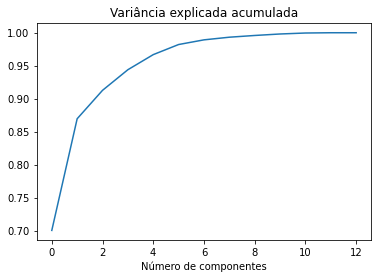

In [15]:
# Computando a matriz de covariâncias
covariance_matrix = np.cov(z_features.T)
print('Formato da matriz de covariâncias:', covariance_matrix.shape)

pca = PCA().fit(covariance_matrix)
print('Número de componentes:', pca.n_components_)

# Podemos perceber pelo plot que de fato nós conseguimos explicar
# boa parte da variânca dos dados com poucos componentes!!
plt.title('Variância explicada acumulada')
plt.xlabel('Número de componentes')
plt.plot(np.cumsum(pca.explained_variance_) / sum(pca.explained_variance_))
plt.show()

Seja $\mathbf{X}_i = (X_{i,1}, \dots, X_{i,13})$ a linha $i$ da matriz ``wine``. Seja $\mathbf{Z}_i = (Z_{i,1}, \dots, Z_{i,13})$ a linha $i$ da matriz ``wine`` PADRONIZADA. Isto é, $Z_{ij} = (X_{ij} - \bar{x}_j )/s_j$ onde $\bar{x}_j$ é a média aritmética e $s_j$ é o desvio-padrão da coluna $j$ da matriz ``wine``.

Vamos considerar $Z_i$ como um vetor-coluna 13-dimensional. Ao invés de usarmos o vetor $Z_i$, estamos usando apenas o vetor $Y_i$ composto pelos dois índices formados pelos dois primeiros componentes principais:
$$\mathbf{Y}_i = \begin{bmatrix}Y_{i1}\\Y_{i2}\end{bmatrix} = \begin{bmatrix}\mathbf{v}'_1 Z_i\\\mathbf{v}'_2 Z_i\end{bmatrix} $$

onde $\mathbf{v}_1$ e $\mathbf{v}_2$ são os dois primeiros autovetores da matriz de correlação de $\mathbf{X}$.

- Preencha os locais com (??) com os valores numéricos corretos (duas casa decimais apenas):

$$
\begin{align}
Y_{i1} & = (??) Z_{i1} + (??) Z_{i2} + (??) Z_{i3} + \dots + (??) Z_{i13} \\
Y_{i2} & = (??) Z_{i1} + (??) Z_{i2} + (??) Z_{i3} + \dots + (??) Z_{i13} \\
\end{align}
$$

In [16]:
print('Valores númericos para Y_i1:', np.round(pca.components_[0], 2))
print('Valores númericos para Y_i2:', np.round(pca.components_[1], 2))

Valores númericos para Y_i1: [-0.07  0.3   0.1   0.28 -0.09 -0.36 -0.4   0.33 -0.29  0.17 -0.32 -0.38
 -0.23]
Valores númericos para Y_i2: [ 0.52  0.11  0.08 -0.26  0.27  0.05 -0.   -0.13  0.01  0.52 -0.28 -0.17
  0.41]


- O último gráfico do script R apresentado na questão é um plot dos pontos $Y_i$ dos 178 vinhos. Identifique três regiões do plano $Y_1$, $Y_2$ que podem ser usadas para classificar futuras amostras de vinhos em uma das três categorias.

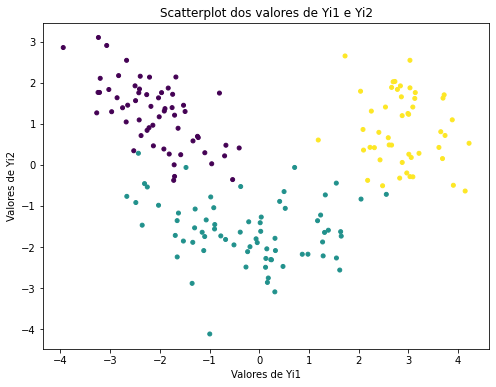

In [17]:
yi1 = pca.components_[0] @ z_features.T
yi2 = pca.components_[1] @ z_features.T

plt.figure(figsize=(8,6))
plt.title('Scatterplot dos valores de Yi1 e Yi2')
plt.scatter(yi1, yi2, s=16, c=labels)
plt.xlabel('Valores de Yi1')
plt.ylabel('Valores de Yi2')
plt.show()

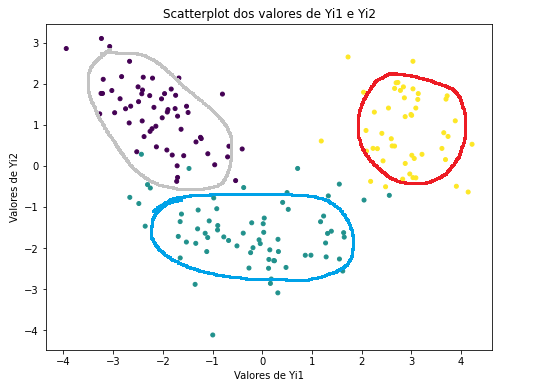

In [18]:
from IPython.display import Image
Image('esboco-areas.png')

Suponha que uma nova amostra de vinho tem sua composição química medida e encontra-se:

$$ \mathbf{x} = (13.95, 3.65, 2.25, 18.4, 90.18, 1.55, 0.48, 0.5, 1.34, 10.2, 0.71, 1.48, 587.14) $$

Obtenha seu vetor $\mathbf{z}$, as suas coordenadas $(y_1, y_2)$ e prediga o seu tipo.

In [19]:
new_wine = np.array([[13.95,3.65,2.25,18.4,90.18,1.55,0.48,0.5,1.34,10.2,0.71,1.48,587.14]])
new_z = scaler.transform(new_wine)

new_y1 = pca.components_[0] @ new_z.T
new_y2 = pca.components_[1] @ new_z.T

print('Vetor z da nova amostra:')
print(new_z, end='\n\n')

print('Suas coordenadas (y1, y2): ', (new_y1, new_y2))

Vetor z da nova amostra:
[[ 1.17273835  1.1792167  -0.42590882 -0.3287952  -0.67134998 -1.19391704
  -1.55541519  1.11315422 -0.43959594  2.22423597 -1.0856445  -1.5984409
  -0.50873325]]

Suas coordenadas (y1, y2):  (array([3.19596154]), array([1.94330925]))


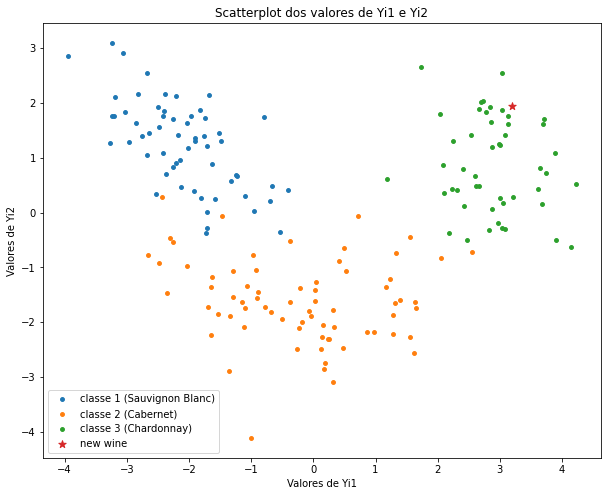

In [20]:
# Ao plotarmos esse ponto, podemos perceber que iriamos predizer esse vinho como da classe 3 (Chardonnay)
# Podemos também realizar cálculos similares aos que foram feitos no exercício dos dígitos!

plt.figure(figsize=(10,8))
plt.title('Scatterplot dos valores de Yi1 e Yi2')

plt.scatter(yi1[labels == 1], yi2[labels == 1], s=15, label='classe 1 (Sauvignon Blanc)')
plt.scatter(yi1[labels == 2], yi2[labels == 2], s=15, label='classe 2 (Cabernet)')
plt.scatter(yi1[labels == 3], yi2[labels == 3], s=15, label='classe 3 (Chardonnay)')
plt.scatter(new_y1, new_y2, s=60, marker='*', label='new wine')

plt.legend()
plt.xlabel('Valores de Yi1')
plt.ylabel('Valores de Yi2')
plt.show()